# Overview

This project tries to train a recurrent neural network to learn how to automatically punctuate a sentence by reading it character by character.

### Surprises

use GRU. 

### Todo:
- [ ] get data

### Done:
- [x] Add temperature to generator
- [x] get training to work
- [x] use optim and Adam
- [x] add self-feeding generator

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from utils import forward_tracer, backward_tracer, Char2Vec, num_flat_features

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from tqdm import tqdm

from IPython.display import clear_output

import os

from bs4 import BeautifulSoup

In [2]:
def get_content(fn):
    with open(fn, 'r') as f:
        source = ""
        for line in f:
            source += line
    return source

In [3]:
def source_gen(path="../engadget_data/"):
    for child, folders, files in os.walk(path):
        for fn in files:
            if fn[0] is ".":
                pass
            else: 
                src = get_content(path + fn)
                soup = BeautifulSoup(src, 'html.parser')
                src = soup.getText()
                yield fn, src

In [4]:
for fn, text in source_gen():
    print(text)
    break


 HTC is making a two-pronged attack on Windows Phone 8, and while it may not match up to the specs on its new flagship, the Windows Phone 8S by HTC (yes, that's the official moniker) has some charm all of its own. The screen is a pretty underwhelming Gorilla Glass-coated 4-inch WVGA LCD, with a similarly middleweight 5-megapixel camera peering out from the other side. Given that it's looking to be priced closer to the One V than the One S, we're not all that surprised. The phone itself is a good-looking slab, thanks to the breezy color schemes and while the build is certainly solid enough, we'd be hard-pressed to put it in league with the 8X, which felt at home in our hand from the start. The 8S is cocooned in a matte plastic finish, arriving in four different color options -- depending on carrier and territory.

 The two-tone color scheme, aside from a few color licks around the lens and ear piece, keeps the second color limited to the bottom edge and the detachable cap. This offers 

In [5]:
import math

In [6]:
def batch_gen(seq_length, source):
    s_l = len(source)
    b_n = math.ceil(s_l/seq_length)
    s_pad = source + " " * (b_n * seq_length - s_l)
    for i in range(b_n):
        yield s_pad[i*seq_length: (i+1)*seq_length]

In [7]:
def get_chars():
    step = 0
    freq = {}
    keys = []
    for file_name, source in tqdm(source_gen()):

        for char in source:
            try:
                freq[char] += 1
            except KeyError:
                freq[char] = 1
                keys.append(char)
        #if step%10000 == 9999:
        #    print(str(step) + ": ln: " + str(len(keys)) + str(["".join(keys)]))
    
    return keys, freq
ks, freqs = get_chars()
print("".join(ks))

49530it [00:12, 4117.46it/s]


 HTCismakngtwo-predcWPh8,lyufSb(').G4VALD5xvOzXB32YM1qU"F/I?jJ&;@N*E0![]9KR:Z$7	6Q+™®—–%©üñè·#=_•¥£€à{}µÜ ’éÛ^Žë●ö¹²…|“”<>~℠―﻿＋＊▪Éçóê»«ū♦°※\αÂº​̈`×±ğ电子书包数字公文äæøå♥‐≥≦Ò‑◦½ô〈∆Ω□◎◇年月日報道関係者各位：　（略称）は、タッチパネルを搭載し好きなスイで使えるハペク脱着式モバノートソコン「」本向けに発売すこと表また。土より順次開始卓越処理能力高い応答性備利用シ合わせて液晶画面キボド体・分離の型取外最薄部軽さ約マ対フブレテプロセサビジメも十ォ揮装速大容量デ保存両方実現傷強ニグ社化ガラ品オィム暗場所入やミがれどあらゆリ機満製名予定／価格下旬以降想円主仕様詳細つ添付ァご参照くだ番カワ点ア示解像度記憶置無線出ェ駆動時間ズ幅奥行～質統属ダュ証書専特徴頑丈ヘ加工施ウ金手持ち運べ精採上左右広視野角輝誇並み硬汚拭圧倒的ナ揃かほ可充技術世界有共同革新内蔵ピ原音限近提供明自調節電源ケ接続簡単ャじ比率操作っ連携毎業快適お客問先通話料号負担受曜祝祭末盆休当吉ヨ資写真等第ザ市荷台めツ販総エそ門評得ざ送々賞達成測法基状況設変米査会株全国元英語版■›́­̃Îá´￼‖̳μïâ˚傅珮倫−￡úã★─⁰➢§ć₩│ ИндикаторⅢⅡāì†ō≠‡í⅓′‟‘ēⓄ討鬼閃乱％␣👍موقعزارةلأتص？³⁴･Ⓡ¼�₹″¬¯㎜Ô○Ø－ﬁ¾℗ə÷¢Φš匠ｘ１ʼ„①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮⑯À∑ﬂî만痴‎č⎯Ö意 ûış¡⁵んょう！ㅡ‮‭‚πÏÃ¸알려드립니다일부언론에서보도한갤럭시후속모델출예정이라는추측은단순루머뿐사실아닙해진게무것없데왜런소문퍼질까요ㅜ Пез⁶⁷〈≤ÁгŁ


 etoainsrlhdcupmgfwyb,v.k-
'STA0P1MICxD2"BWEGN3OHRLFV5)(4Uzj9:q	867$X/KJY?;QZ[]&!–®™*%+=•_#·@£ €—é¥’{}‐ü|~α×°>à￼©^�\―”ö　“●…ー℠ó§ñ‟±­◦・ッ、：µ‖​


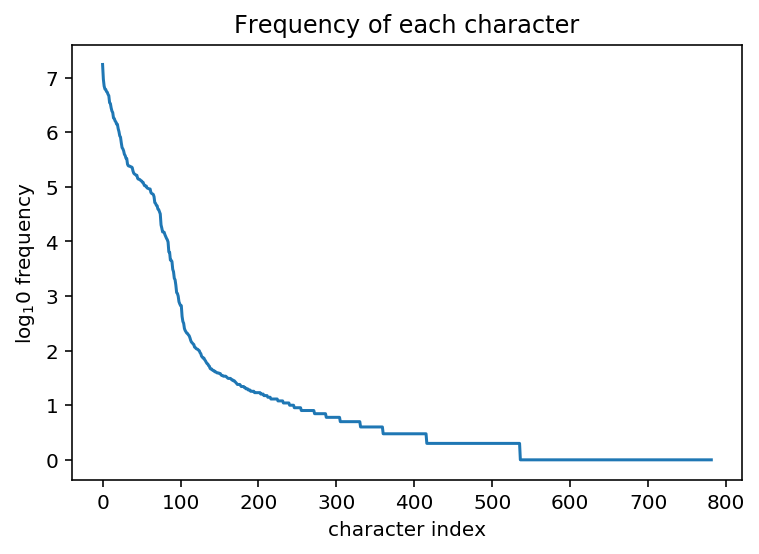

In [8]:
order = np.argsort([freqs[k] for k in ks])[::-1]
chars_ordered = "".join(np.array([k for k in ks])[order])
print(chars_ordered[:140])

plt.title('Frequency of each character')
plt.plot(np.array([math.log10(freqs[k]) for k in ks])[order])
plt.ylabel('$\log_10$ frequency')
plt.xlabel('character index')
plt.show()

In [9]:
input_chars = list(" ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz01234567890")
output_chars = ["<nop>", "<cap>"] + list(".,;:?!\"'")

In [10]:
class GruRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, layers=1, bi=False):
        super(GruRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.layers = layers
        self.bi_mul = 2 if bi else 1
        
        self.encoder = nn.Linear(input_size, hidden_size)
        self.gru = nn.GRU(input_size, hidden_size, self.layers, bidirectional=bi)
        self.decoder = nn.Linear(hidden_size * self.bi_mul, output_size)
        self.softmax = F.softmax
        
    def forward(self, x, hidden):
        #embeded = self.encoder(x)
        embeded = x
        #print(embeded.view(-1, 1, self.input_size).size())
        #print(hidden.size())
        gru_output, hidden = self.gru(embeded.view(-1, 1, self.input_size), hidden.view(self.layers * self.bi_mul, -1, self.hidden_size))
        #print(gru_output.size())
        output = self.decoder(gru_output.view(-1, self.hidden_size * self.bi_mul))
        return output, hidden
    
    def init_hidden(self, random=False):
        if random:
            return Variable(torch.randn(self.layers * self.bi_mul, self.hidden_size))
        else:
            return Variable(torch.zeros(self.layers * self.bi_mul, self.hidden_size)) 
"""
input_size = 105
hidden_size = 105
output_size = 105
layers = 2

gRNN = GruRNN(input_size, hidden_size, output_size, layers)

gRNN(Variable(torch.FloatTensor(10000, 105)),
     Variable(torch.FloatTensor(layers, 105)))"""

'\ninput_size = 105\nhidden_size = 105\noutput_size = 105\nlayers = 2\n\ngRNN = GruRNN(input_size, hidden_size, output_size, layers)\n\ngRNN(Variable(torch.FloatTensor(10000, 105)),\n     Variable(torch.FloatTensor(layers, 105)))'

In [11]:
class Engadget():
    def __init__(self, model, char2vec=None, output_char2vec=None):
        self.model = model
        if char2vec is None:
            self.char2vec = Char2Vec()
        else:
            self.char2vec = char2vec
            
        if output_char2vec is None:
            self.output_char2vec = self.char2vec
        else:
            self.output_char2vec = output_char2vec
            
        self.loss = 0
        self.losses = []
    
    def init_hidden_(self, random=False):
        self.hidden = model.init_hidden(random)
        return self
    
    def save(self, fn="GRU_Engadget.tar"):
        torch.save({
            "hidden": self.hidden, 
            "state_dict": model.state_dict(),
            "losses": self.losses
                   }, fn)
    
    def load(self, fn):
        checkpoint = torch.load(fn)
        self.hidden = checkpoint['hidden']
        model.load_state_dict(checkpoint['state_dict'])
        self.losses = checkpoint['losses']
    
    def setup_training(self, learning_rate):
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
        self.init_hidden_()
        
    def reset_loss(self):
        self.loss = 0
        
    def forward(self, input_text, target_text):
        
        self.hidden = self.hidden.detach()
        
        self.optimizer.zero_grad()
        self.next_(input_text)
        target_vec = Variable(self.output_char2vec.char_code(target_text))
        self.loss += self.loss_fn(self.output, target_vec)
        
    def descent(self):
        if self.loss is 0:
            print(self.loss)
            print('Warning: loss is zero.')
            return
        
        self.loss.backward()
        self.optimizer.step()
        self.losses.append(self.loss.cpu().data.numpy())
        self.reset_loss()
    
    def embed(self, input_data):
        self.embeded = Variable(self.char2vec.one_hot(input_data))
        return self.embeded
        
    def next_(self, input_text):
        self.output, self.hidden = self.model(self.embed(input_text), self.hidden)
        return self
    
    def softmax_(self, temperature=0.5):
        self.softmax = self.model.softmax(self.output/temperature)
        return self
    
    def output_chars(self, start=None, end=None):
        indeces = torch.multinomial(self.softmax[start:end]).view(-1)
        return self.output_char2vec.vec2list(indeces)

In [12]:
def apply_punc(text_input, text_output):
    result = ""
    for char1, char2 in zip(text_input, text_output):
        if char2 == "<cap>":
            result += char1.upper()
        elif char2 != "<nop>":
            result += char1 + char2
        else:
            result += char1
    return result


result = apply_punc("t s", ['<cap>', '<nop>', ','])
assert(result == "T s,")

In [13]:
def extract_punc(string_input, input_chars, output_chars):
    input_source = []
    output_source = []
    for i, char in enumerate(string_input):
        # print(i, char)
        if char.isupper() and len(output_source) > 0:
            output_source.append("<cap>")
            input_source.append(char.lower())
        elif char in output_chars and len(output_source) > 0:
            output_source[-1] = char
        elif char in input_chars:
            input_source.append(char)
            output_source.append("<nop>")
    return input_source, output_source

i, o = extract_punc("This's a simple ATI chassis.", input_chars, output_chars)
result = apply_punc("".join(i), o)
print(result)

This's a simple ATI chassis.


In [14]:
char2vec = Char2Vec(chars=input_chars, add_unknown=True)
output_char2vec = Char2Vec(chars = output_chars)
input_size = char2vec.size 
output_size = output_char2vec.size

print("input_size is: " + str(input_size) + "; ouput_size is: " + str(output_size))
hidden_size = input_size
layers = 1

model = GruRNN(input_size, hidden_size, output_size, layers=layers, bi=True)
egdt = Engadget(model, char2vec, output_char2vec)
egdt.load('./Gru_Engadget_1_layer_bi.tar')

input_size is: 65; ouput_size is: 10


In [15]:
learning_rate = 2e-3
egdt.setup_training(learning_rate)

Epoch 0


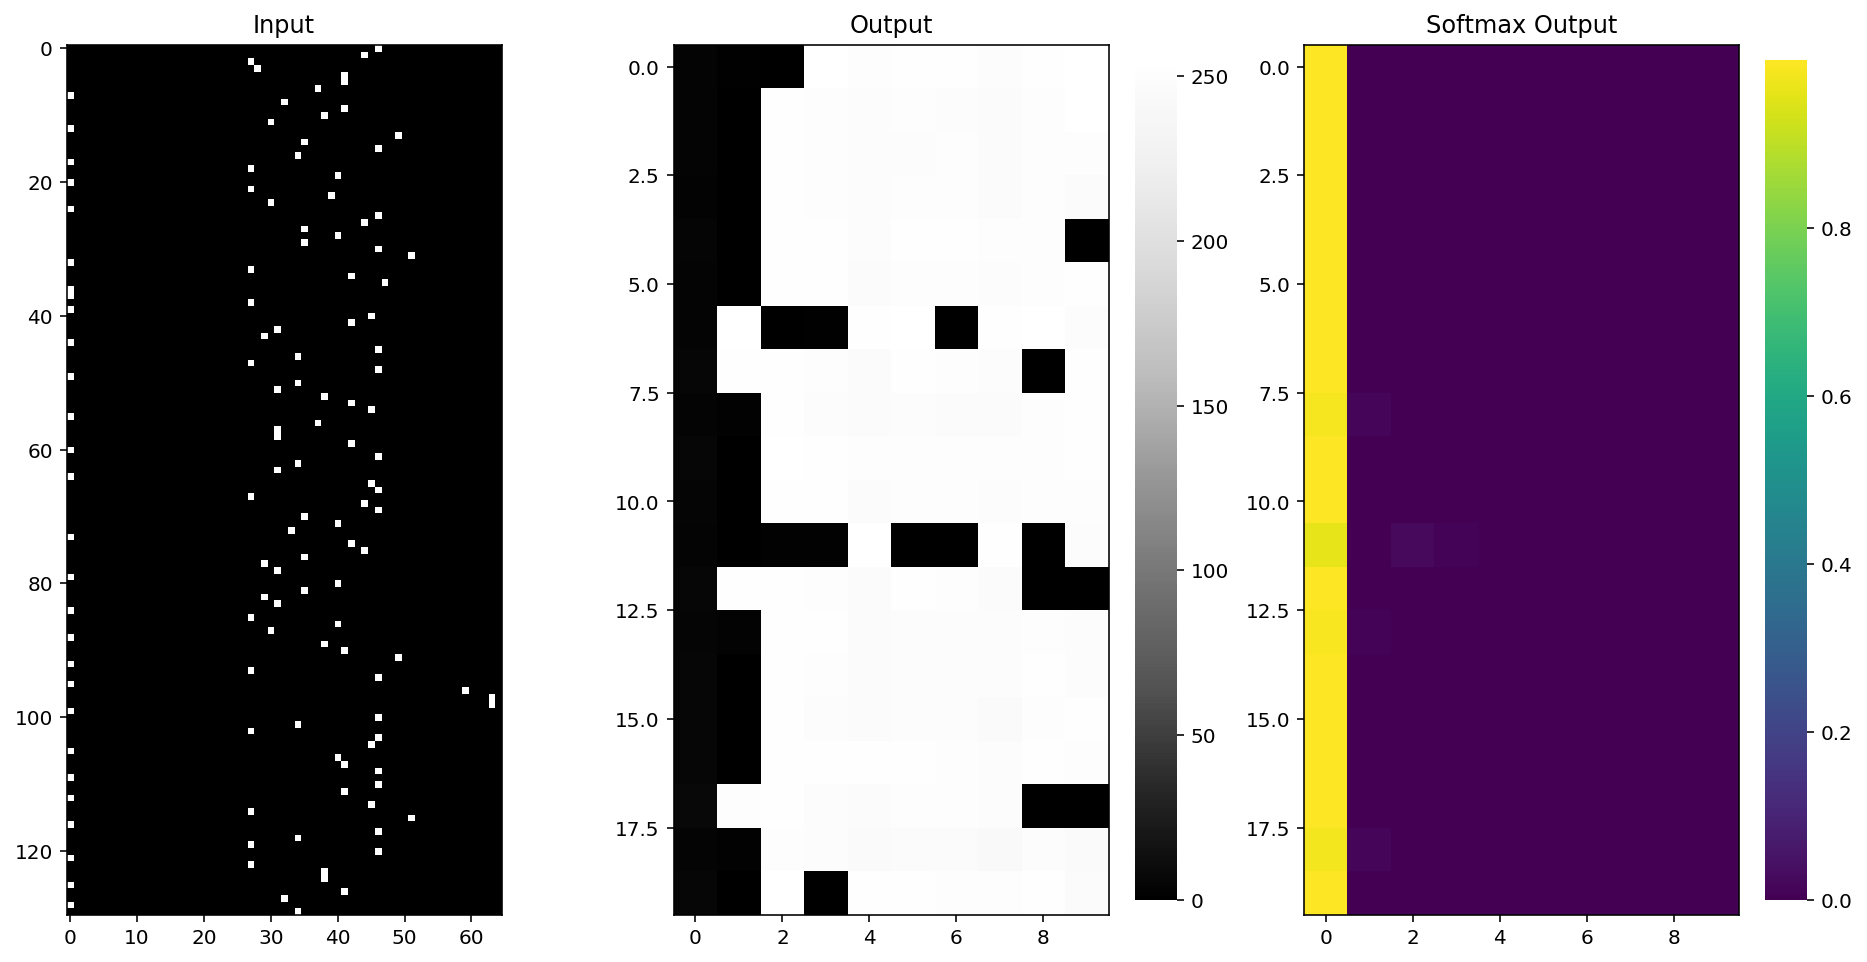

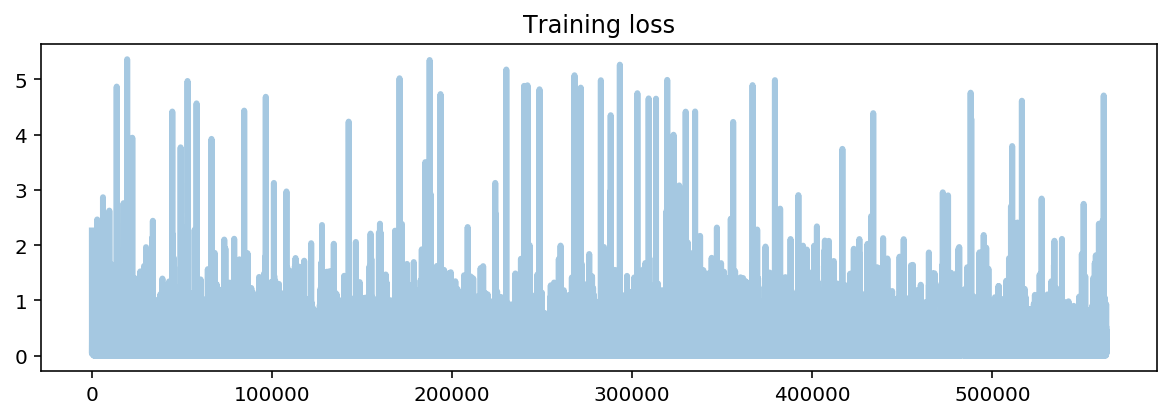

trabook fold with an amD Trinity apu  a spec that helps keep the starting price nice and low at 600 that's not to say that all of hp's sleekBooks ditch intel processors but given the choice bet


48it [01:01,  1.44s/it]

KeyboardInterrupt: 

In [16]:
model.zero_grad()
egdt.reset_loss()

seq_length = 200

for epoch_num in range(40):
    
    step = 0
    for file_name, source in tqdm(source_gen()):
        
        for source_ in batch_gen(seq_length, source):
            
            step += 1
            
            input_source, output_source = extract_punc(source_, egdt.char2vec.chars, egdt.output_char2vec.chars)
            
            try:
                egdt.forward(input_source, output_source)
                if step%1 == 0:
                    egdt.descent()
                    
            except KeyError:
                print(source)
                raise KeyError
            

            if step%400 == 399:
                clear_output(wait=True)
                print('Epoch {:d}'.format(epoch_num))

                egdt.softmax_()

                fig = plt.figure(figsize=(16, 8))
                fig.subplots_adjust(hspace=0.0625)
                plt.subplot(131)
                plt.title("Input")
                plt.imshow(egdt.embeded[:130].data.byte().numpy(), cmap="Greys_r", interpolation="none")
                plt.subplot(132)
                plt.title("Output")
                im = plt.imshow(egdt.output[:20].data.byte().numpy(), cmap="Greys_r", interpolation="none")
                cb = plt.colorbar(im, fraction=0.08); cb.outline.set_linewidth(0)
                plt.subplot(133)
                plt.title("Softmax Output")
                im = plt.imshow(egdt.softmax[:20].cpu().data.numpy(), interpolation="none")
                cb = plt.colorbar(im, fraction=0.08); cb.outline.set_linewidth(0)
                plt.show()

                plt.figure(figsize=(10, 3))
                plt.title('Training loss')
                plt.plot(egdt.losses, label="loss", linewidth=3, alpha=0.4)
                plt.show()
                
                # print(source_)
                
                result = apply_punc(input_source, egdt.output_chars())
                print(result)

## Now use the network to generate text!

In [ ]:
egdt.save('./data/Gru_Engadget_1_layer_bi.tar')

In [ ]:
from ipywidgets import widgets
from IPython.display import display

**Note**: Again, using a zero initial state for the hidden state gives a much better result for the prediction.

In [ ]:
def predict_next(input_text, gen_length=None, temperature=0.05):
    
    if gen_length is None: 
        gen_length = len(input_text)
    
    clear_output(wait=True)
    #egdt = Engadget(model).init_hidden_(random=True)
    
    egdt.init_hidden_()
    egdt.next_(input_text)
    egdt.softmax_()
    output = egdt.output_chars()
    
    #print(output)
    result = apply_punc(input_text, output)
    print(result)
    
    plt.figure(figsize=(12, 9))
    plt.subplot(311)
    plt.title("Input")
    plt.imshow(egdt.embeded[:130].data.byte().numpy().T, cmap="Greys_r", interpolation="none")
    plt.subplot(312)
    plt.title("Output")
    plt.imshow(egdt.output[:130].data.byte().numpy().T, interpolation="none")
    plt.subplot(313)
    plt.title("Softmax")
    plt.imshow(egdt.softmax[:130].cpu().data.numpy().T, interpolation="none")
    plt.show()

predict_next("   this wont be a simple sentense it doesnt have puntuation yet the network can add", 200, 1)

In [ ]:
text_input = widgets.Text()
display(text_input)

def handle_submit(sender):
    #print(text_input.value)
    predict_next(text_input.value, 2000, temperature=0.5)
    
text_input.on_submit(handle_submit)

The ge